In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = '../resData/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
plt.style.use('ggplot')
""" 그래프에 음수기호를 유니코드가 아닌 ASCII코드로 출력되도록 하는 설정. 
    이 설정이 없으면 -를 인식하지 못해 깨짐 현상이 발생된다. """
plt.rcParams['axes.unicode_minus'] = False

In [10]:
df = pd.read_excel('../resData/남북한_발전_전력량.xlsx', engine='openpyxl')
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
# 클래스속성 T를 사용해서 데이터프레임을 전치
df = df.T

In [11]:
# 증감률(변동률) 계산을 위해 '합계'를 '총발전량'으로 이름 변경
df = df.rename(columns = {'합계':'총발전량'})
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [8]:
# 총발전량 열의 데이터를 1행씩 뒤로 이동시켜 새로운 컬럼을 생성한다.
df['총발전량 - 1년'] = df['총발전량'].shift(1)

In [9]:
# 증감률을 계산하여 새로운 컬럼을 생성한다.
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100
df

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감률
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


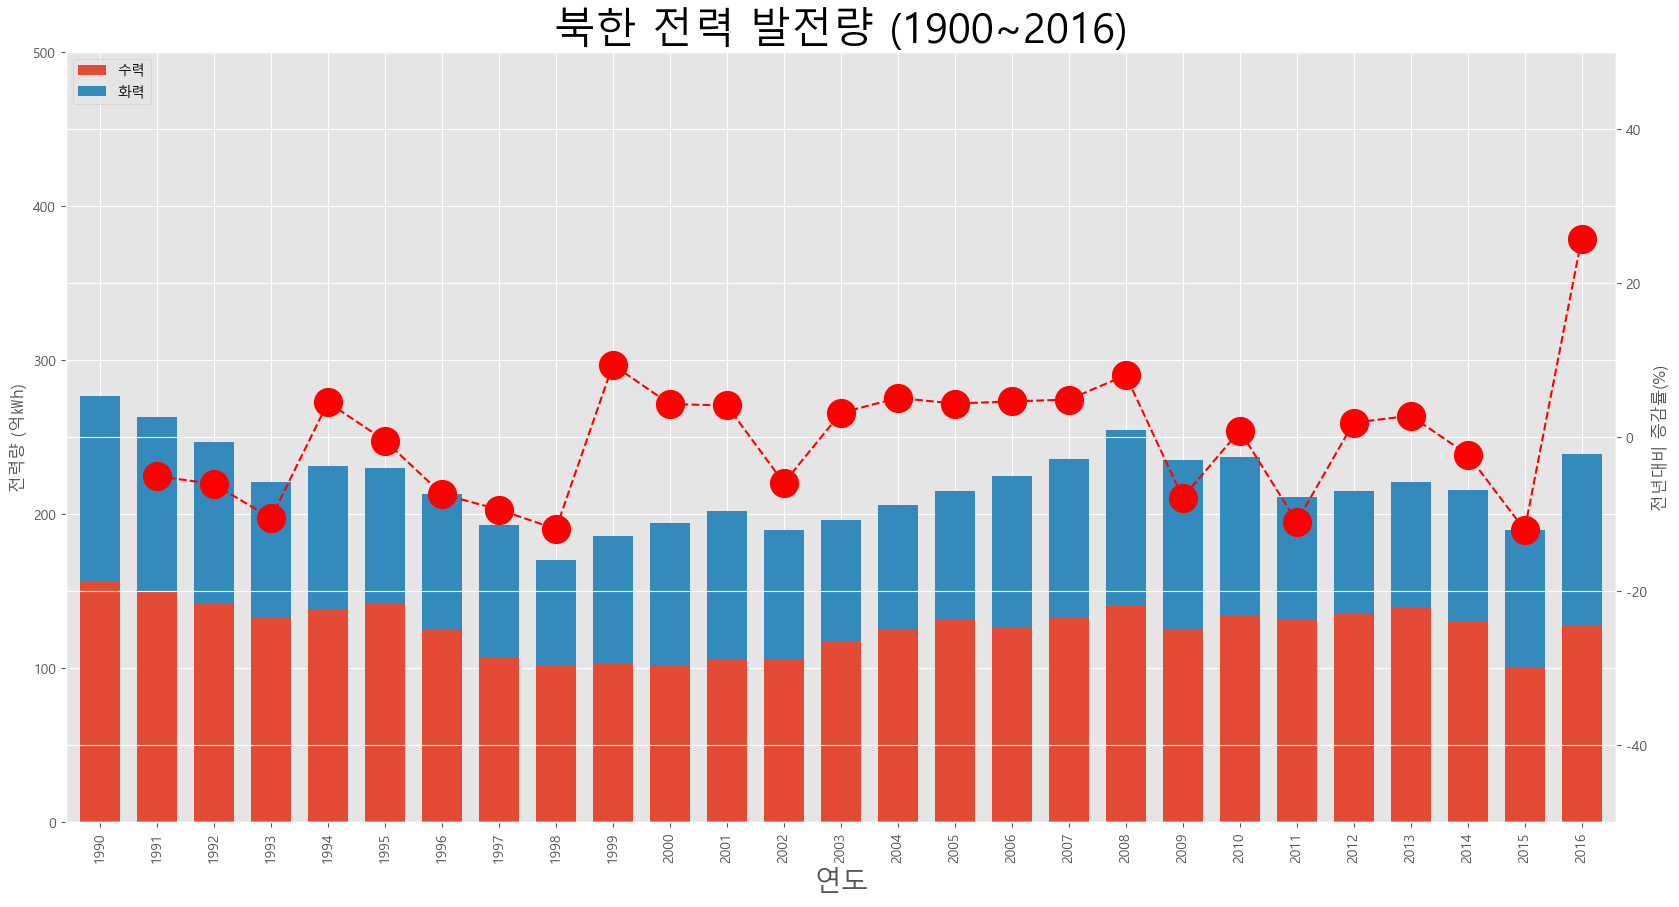

In [7]:
""" 수력, 화력 데이터를 이용해서 2개의 축을 가진 그래프를 생성.
    수직형 막대그래프가 겹쳐지지 않도록 설정하여 출력. """
axe1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)
# twinx() 함수로 Axe 객체의 복사본 생성
axe2 = axe1.twinx()
""" 생성된 복사본은 꺽은선 그래프를 표시한다. 
    ls = '--' 옵션은 선 스타일을 점선으로 설정한다. """
axe2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
          color='red', label='전년대비 증감률(%)')

# y축의 범위 설정
axe1.set_ylim(0, 500)
axe2.set_ylim(-50, 50)

# 라벨 설정
axe1.set_xlabel('연도', size=20)
axe1.set_ylabel('전력량 (억㎾h)')
axe2.set_ylabel('전년대비 증감률(%)')

# 타이틀 및 범례
plt.title('북한 전력 발전량 (1900~2016)', size=30)
axe1.legend(loc='upper left')